In [23]:
# imports
import pathlib
import tarfile
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

## Downloading the data

In [7]:
def load_housing_data() -> pd.DataFrame:
    """
        Automatically downloads the latest version of the housing data of California 1990
     
    Returns:
        the housing data of California 1990 as CSV
    """
    
    path = pathlib.Path("datasets/housing.tgz")
    
    # Checks if the file exists
    if not path.is_file():
        
        # Create datasets folder in the current directory
        pathlib.Path('datasets').mkdir(parents=True, exist_ok=True)
        
        # The location of the data
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        
        # The retrieval of the data
        urllib.request.urlretrieve(url, path)
        
        # The unpacking of the data
        with tarfile.open(path) as housing_data:
            housing_data.extractall(path='datasets')
            
    return pd.read_csv(pathlib.Path('./datasets/housing/housing.csv'))


housing = load_housing_data()

## Data Exploration

In [14]:
## The first 5 rows of the data
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [15]:
## The data types of the columns + how many values are non-valued 
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [16]:
## A simple overview to see the distribution of numerical values in the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


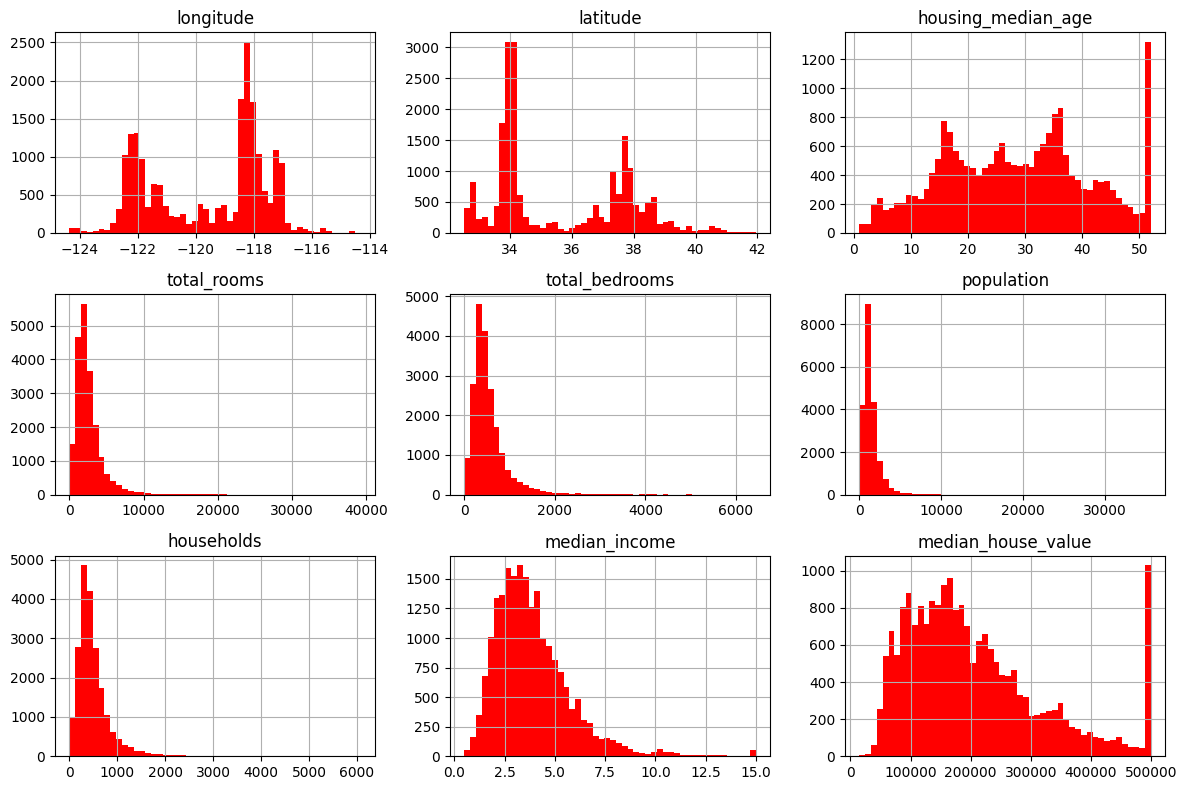

In [21]:
## Instead of a numerical overview, we can also visualize the data.
## Often this give a way better overview of the distribution of the data

housing.hist(bins=50, figsize=(12, 8), color = 'red')

plt.tight_layout()
plt.show()

## Creating a Test set

In [31]:
def shuffle_and_split_data(data: pd.DataFrame, test_ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    
    This function splits the data into a training and a testing set.
    
    Args:
        data (Dataframe): All the data
        test_ratio (float): the ratio that should end up in the testing set

    Returns:
        a tuple consisting of two dataframes. One for the training data, the other for testing.
    """
    
    np.random.seed(42)
    
    m = data.shape[0]
    
    random_indices = np.random.permutation(m)
    
    cutoff_index = int(test_ratio * m)
    
    train_indices, test_indices = random_indices[cutoff_index:], random_indices[:cutoff_index]
    
    return data.iloc[train_indices], data.iloc[test_indices]


In [32]:
# We can also simplify the split function by using the built in function of Scikit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [35]:
# you can "pd.cut" to categorise values into predefined bins.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


                               